In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [83]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data=train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns')

In [7]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
train_data.dropna(subset=['Embarked'], inplace=True)

In [10]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [11]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_data['Age']=train_data['Age'].fillna(train_data.Age.mean())
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.642093,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


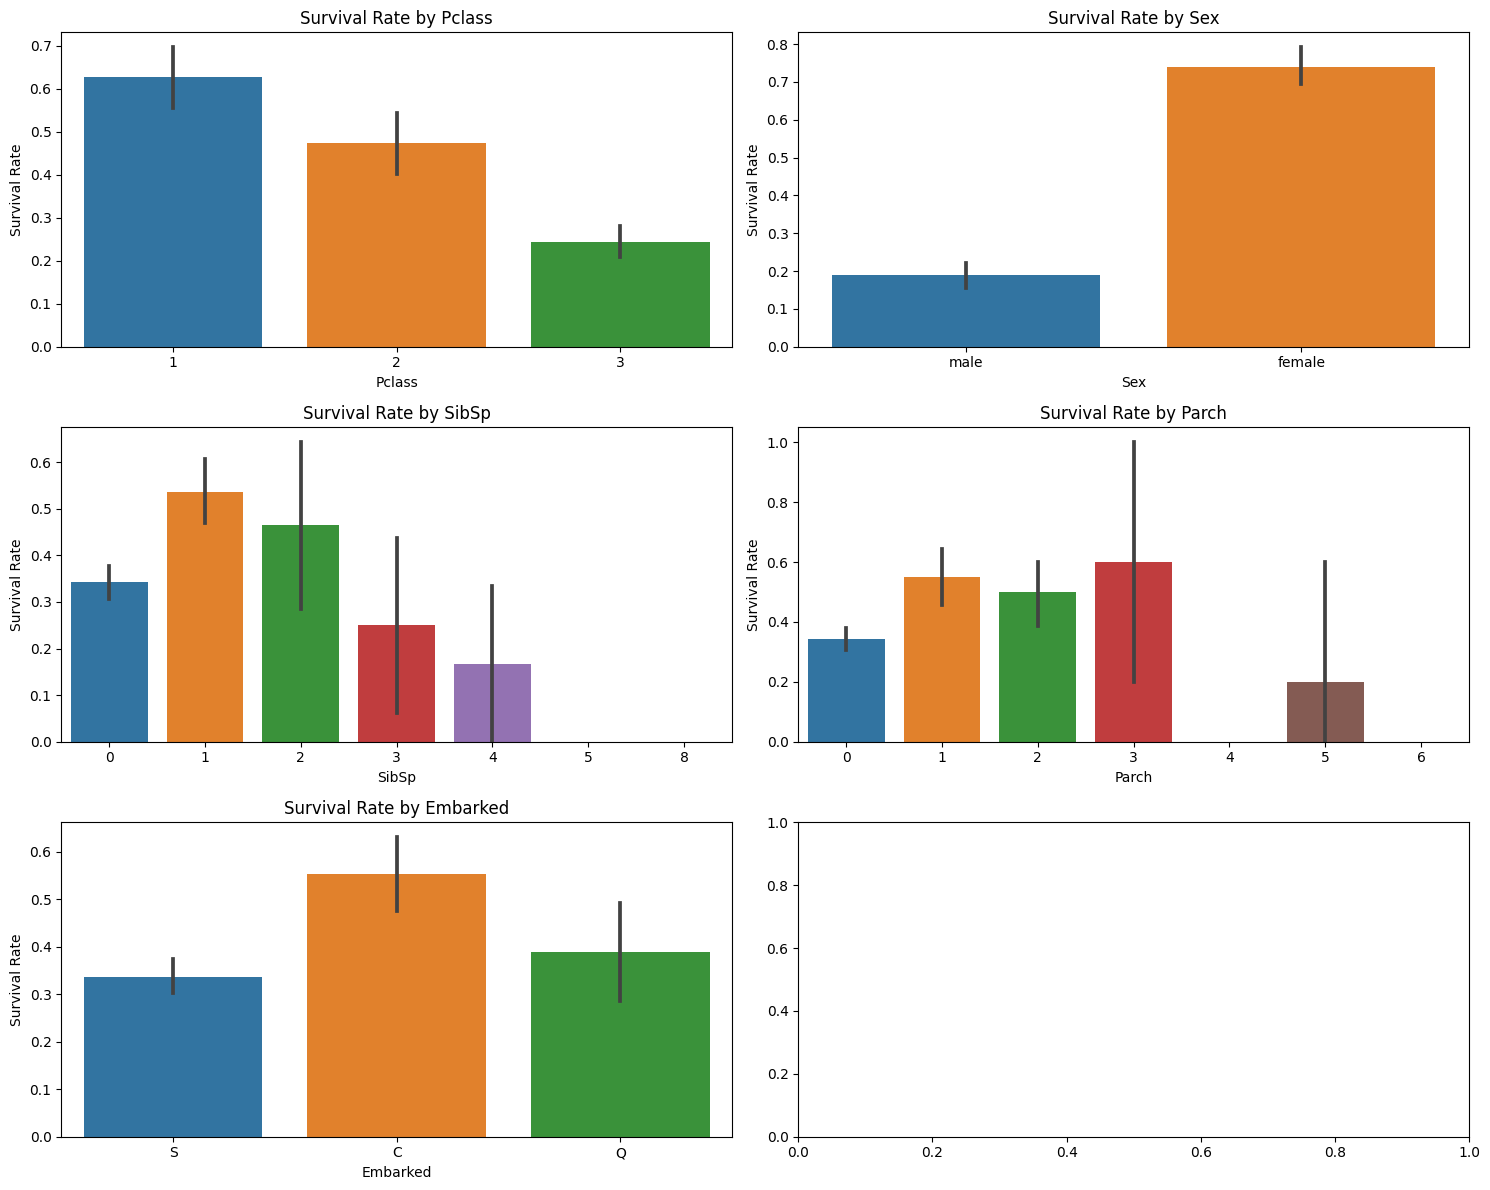

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = train_data.columns.drop(['Survived','Fare','Age'])  

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12)) 
axes = axes.flatten() 

for i, col in enumerate(columns):
    sns.barplot(x=train_data[col], y=train_data['Survived'], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Survival Rate")
    axes[i].set_title(f"Survival Rate by {col}")

plt.tight_layout()
plt.show()


In [14]:
train_data=train_data.drop(['Parch','SibSp'],axis='columns')

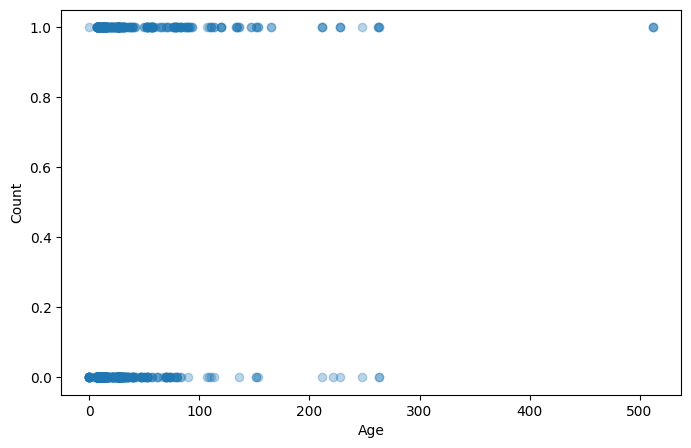

In [15]:

plt.figure(figsize=(8, 5))
plt.scatter(data=train_data, x="Fare", y="Survived",alpha=0.3)

plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


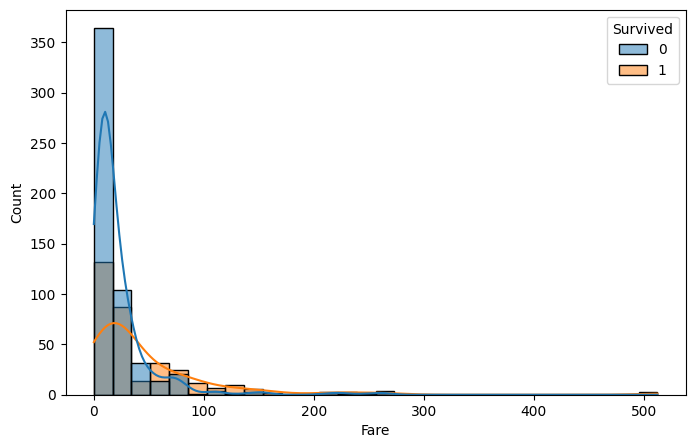

In [16]:

plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x="Fare", hue="Survived", kde=True, bins=30)

plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Embarked']=le.fit_transform(train_data['Embarked'])

In [18]:
train_data['Sex']=le.fit_transform(train_data['Sex'])

In [19]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [84]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
test_data=test_data.drop(['Name','Ticket','Cabin','Parch','SibSp'],axis='columns')

In [86]:
test_data['Embarked']=le.fit_transform(test_data['Embarked'])
test_data['Sex']=le.fit_transform(test_data['Sex'])

In [87]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.5,7.8292,1
1,893,3,0,47.0,7.0000,2
2,894,2,1,62.0,9.6875,1
3,895,3,1,27.0,8.6625,2
4,896,3,0,22.0,12.2875,2


In [88]:
test_data['Age']=test_data['Age'].fillna(test_data.Age.mean())

In [89]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
dtype: int64

In [90]:
test_data=test_data.dropna()

In [25]:
X_train=train_data.drop(['Survived'],axis='columns')
y_train=train_data['Survived']

In [91]:
X_test=test_data.drop('PassengerId',axis='columns')

In [26]:
X_train.shape,X_test.shape,y_train.shape

((889, 5), (418, 5), (889,))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

model_params = {
    'svc': {'model': SVC(), 'params': {'C': [0.1, 1], 'kernel': ['linear', 'rbf'], "gamma": ['scale']}},  
    'rfc': {'model': RandomForestClassifier(), 'params': {'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'],'max_depth':[10]}},  
    "lr": {'model': LogisticRegression(), 'params': {'C': [0.1, 1, 10], "solver": ['lbfgs', 'liblinear']}},  
    'mnb': {'model': MultinomialNB(), 'params': {}},  
    'gnb': {"model": GaussianNB(), 'params': {}},  
    'dtc': {'model': DecisionTreeClassifier(), 'params': {"criterion": ['gini', 'entropy'], 'splitter': ['best']}}  
}



In [28]:
scores=[]
for model_name,mp in model_params.items():
    cv=GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
    cv.fit(X_train,y_train)
    scores.append({"model":model_name,
                   "best_scores":cv.best_score_,
                   'best_params':cv.best_params_})

In [34]:
df=pd.DataFrame(scores,columns=['model','best_scores',"best_params"])
df

,model,best_scores,best_params
0,svc,0.786249,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
1,rfc,0.835789,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
2,lr,0.799796,"{'C': 0.1, 'solver': 'lbfgs'}"
3,mnb,0.687283,{}
4,gnb,0.778396,{}
5,dtc,0.790820,"{'criterion': 'entropy', 'splitter': 'best'}"


In [36]:
model= RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=100,random_state=1)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=1)

In [93]:
predictions = model.predict(X_test)

In [95]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)